In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)

df = pd.read_csv("../data/multidimensional_with_crt.csv")

# compute the assessment error as the absolute difference between
# the (rescaled) ground truth value and the overal truthfulness value
df["doc_assessment_error"] = abs((df["doc_ground_truth_value"] - 2) - df["doc_overall-truthfulness_value"])

df.sample(5)

,unit_id,tries_amount,questionnaire_amount,dimensions_amount,document_amount,current_try,q_0_age_question,q_0_age_answer,q_0_age_value,q_0_school_question,q_0_school_answer,q_0_school_value,q_0_taxes_question,q_0_taxes_answer,q_0_taxes_value,q_0_political_views_question,q_0_political_views_answer,q_0_political_views_value,q_0_consideration_question,q_0_consideration_answer,q_0_consideration_value,q_0_southern_border_question,q_0_southern_border_answer,q_0_southern_border_value,q_0_environment_question,q_0_environment_answer,q_0_environment_value,q_0_time_elapsed,q_0_accesses,q_1_farmers_question,q_1_farmers_answer,q_1_farmers_value,q_1_time_elapsed,q_1_accesses,q_2_marks_question,q_2_marks_answer,q_2_marks_value,q_2_time_elapsed,q_2_accesses,q_3_athletics_question,q_3_athletics_answer,q_3_athletics_value,q_3_time_elapsed,q_3_accesses,doc_index,doc_name,doc_statement,doc_claimant,doc_date,doc_originatedFrom,doc_ground_truth_value,doc_ground_truth_abc_label,doc_ground_truth_abc_verdict,doc_ground_truth_politifact_label,doc_source,doc_overall-truthfulness_value,doc_overall-truthfulness_label,doc_overall-truthfulness_justification,doc_overall-truthfulness_url,doc_confidence_value,doc_confidence_label,doc_confidence_justification,doc_confidence_url,doc_correctness_value,doc_correctness_label,doc_correctness_justification,doc_correctness_url,doc_neutrality_value,doc_neutrality_label,doc_neutrality_justification,doc_neutrality_url,doc_comprehensibility_value,doc_comprehensibility_label,doc_comprehensibility_justification,doc_comprehensibility_url,doc_precision_value,doc_precision_label,doc_precision_justification,doc_precision_url,doc_completeness_value,doc_completeness_label,doc_completeness_justification,doc_completeness_url,doc_speaker's-trustworthiness_value,doc_speaker's-trustworthiness_label,doc_speaker's-trustworthiness_justification,doc_speaker's-trustworthiness_url,doc_informativeness_value,doc_informativeness_label,doc_informativeness_justification,doc_informativeness_url,doc_accesses,doc_time_elapsed,q_1_farmers_score,q_2_marks_score,q_3_athletics_score,doc_assessment_error
1491,unit_72,10,4,9,11,1,What is your age range?,26-35,2.0,What is the highest level of school you have c...,Four year college degree/bachelor’s degree,3.0,Last year what was your total family income fr...,"50,000 to less than 75,000",5.0,"In general, would you describe your political ...",Liberal,3.0,"In politics today, do you consider yourself a",Democrat,1.0,Should the U.S. build a wall along the souther...,Disagree,1.0,Should the government increase environmental r...,Agree,0.0,302.79,1,If three farmers can plant three trees in thre...,NaN,9.0,150.47,1,Sean received both the 5th highest and the 5th...,NaN,1.0,19.03,1,"In an athletics team, females are four times m...",NaN,5.0,47.81,1,6.0,REP_LIE_doc6,Corrupt political bosses Money laundering Frau...,New Jersey Republican State Committee,2011.0,ad,1.0,NaN,NaN,pants-on-fire,politifact,-1.0,disagree,NaN,https://www.acamstoday.org/fraud-and-money-lau...,-1.0,disagree,NaN,NaN,-1.0,disagree,NaN,NaN,-1.0,disagree,NaN,NaN,-1.0,disagree,NaN,NaN,-1.0,disagree,NaN,NaN,-1.0,disagree,NaN,NaN,-1.0,disagree,NaN,NaN,-1.0,disagree,NaN,NaN,1.0,57.53,0,0,0,0.0
493,unit_89,10,4,9,11,1,What is your age range?,26-35,2.0,What is the highest level of school you have c...,Four year college degree/bachelor’s degree,3.0,Last year what was your total family income fr...,"40,000 to less than 50,000",4.0,"In general, would you describe your political ...",Moderate,2.0,"In politics today, do you consider yourself a",Independent,2.0,Should the U.S. build a wall along the souther...,Agree,0.0,Should the government increase environmental r...,No opinion either way,2.0,30.14,1,If three farmers can plant three trees in thre...,NaN,3.0,85.64,1,Sean received both the 5th highest and the 5th...,NaN,9.0,9.98,1,"In an athletics team, females are four times m...",NaN,4.0,24.33,1,9.0,Labor_Negative_doc4,It is 22 billion Mr Rudd said on the A

<AxesSubplot:xlabel='doc_assessment_error', ylabel='Percent'>

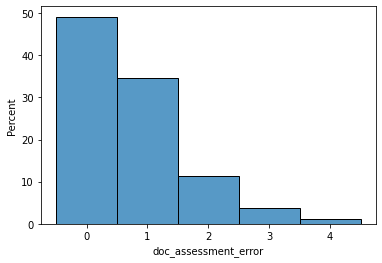

In [63]:
sns.histplot(data=df["doc_assessment_error"].astype("category"), stat="percent")

Distribution of assessment error by different worker grouping methods.

<AxesSubplot:xlabel='doc_assessment_error', ylabel='doc_confidence_label'>

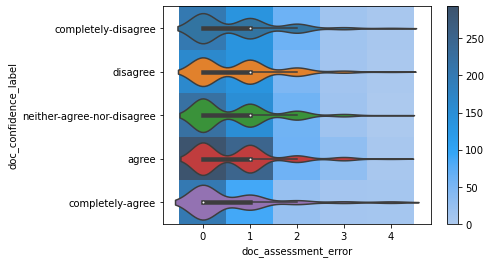

In [19]:
df_tmp = df.sort_values(by="doc_confidence_value")
df_tmp["doc_assessment_error"] = df_tmp["doc_assessment_error"].astype("category")
sns.histplot(x="doc_assessment_error", y="doc_confidence_label", data=df_tmp, cbar=True)
sns.violinplot(x="doc_assessment_error", y="doc_confidence_label", data=df.sort_values(by="doc_confidence_value"))

<AxesSubplot:xlabel='doc_assessment_error', ylabel='doc_time_elapsed'>

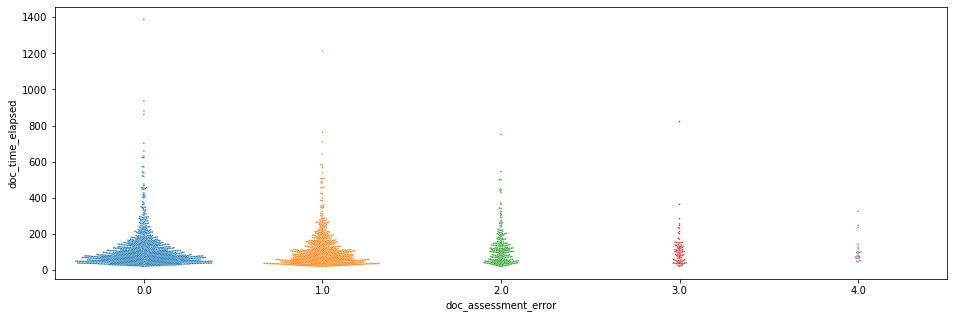

In [39]:
plt.figure(figsize=(16, 5))
sns.swarmplot(x="doc_assessment_error", y="doc_time_elapsed", data=df, size=1.5)